# PCA Basics - Coding Exercises

In this notebook you will apply what you learned about PCA in the previous lesson to real stock data.

# Get Returns

In the previous lesson we used 2-dimensional randomly correlated data to see how we can use PCA to for dimensionality reduction. In this notebook, we will do the same but for 490-dimensional data of stock returns. We will get the stock returns using Zipline and data from Quotemedia, just as we learned in previous lessons. The function `get_returns(start_date, end_date)` in the `utils` module, gets the data from the Quotemedia data bundle and produces the stock returns for the given `start_date` and `end_date`. You are welcome to take a look at the `utils` module to see how this is done.

In the code below, we use `utils.get_returns` funtion to get the returns for stock data between `2011-01-05` and `2016-01-05`. You can change the start and end dates, but if you do, you have to make sure the dates are valid trading dates. 

In [30]:
import sys 
import os 

sys.path.append(os.path.join(os.path.dirname('Notes'), '..'))

import utils

# Get the returns for the fiven start and end date. Both dates must be valid trading dates
returns = utils.get_data_returns()

# Display the first rows of the returns
returns.head()

/home/ankit/AI_for_trading/Notes/multifactor_models/utils.py:44: UserWarning: Overwriting bundle with name 'yahoo_NYSE'
  register(


,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABT]),Equity(6 [ACN]),Equity(7 [ADBE]),Equity(8 [ADI]),Equity(9 [ADM]),...,Equity(398 [WYNN]),Equity(399 [XEL]),Equity(400 [XOM]),Equity(401 [XRAY]),Equity(402 [XRX]),Equity(403 [XYL]),Equity(404 [YUM]),Equity(405 [ZBH]),Equity(406 [ZION]),Equity(407 [ZTS])
2015-01-08,0.029975,0.012262,0.008765,0.038384,0.010459,0.020554,0.015249,0.025454,0.017655,-0.014609,...,0.012031,0.011599,0.016645,0.024689,0.027531,0.007546,0.017404,0.010623,0.013994,0.015399
2015-01-09,-0.007337,-0.030563,-0.005089,0.001108,-0.027355,-0.010508,-0.001113,-0.014811,-0.000730,-0.008530,...,0.012499,-0.012285,-0.001410,-0.014569,-0.005798,-0.018863,-0.001758,-0.014427,-0.027975,0.001584
2015-01-12,-0.011826,-0.046905,-0.008546,-0.024676,-0.000304,0.008407,-0.003007,-0.010022,-0.010051,-0.012495,...,-0.003958,-0.008845,-0.019218,-0.009477,-0.010199,-0.021770,-0.007480,0.002370,-0.015349,-0.018757
2015-01-13,-0.013962,0.016539,-0.032530,0.008897,-0.036040,-0.021281,0.003575,-0.007452,-0.011445,0.001452,...,0.009093,0.008087,-0.003653,-0.003062,0.005166,0.002312,-0.004121,0.002191,-0.017147,-0.014049
2015-01-14,-0.012389,-0.019643,-0.019056,-0.003811,0.004890,-0.007397,-0.011689,-0.008500,-0.000747,-0.017191,...,-0.008077,0.008852,-0.002889,-0.014587,0.004389,-0.006344,-0.004138,-0.013219,-0.017050,0.005139


# Visualizing the Data

As we san see above, the `returns` dataframe, contains the stock returns for 490 assets. Eventhough we can't make 490-dimensional plots, we can plot the data for two assets at a time. This plot willl then show us visually how correlated the stock returns are for a pair of stocks.

In the code below, we use the `.plot.scatter(x, y)` method to make a scatter plot of the returns of column `x` and column `y`. The `x` and `y` parameters are both integers and idicate the number of the columns we want to plot. For example, if we want to see how correlated the stock of `AAL` and `AAPL` are, we can choose `x=1` and `y=3`, since we can see from the dataframe above that stock `AAL` corresponds to column number `1`, and stock `AAPL` corresponds to column number `3`. You are encouraged to plot different pairs of stocks to see how correlated they are.  

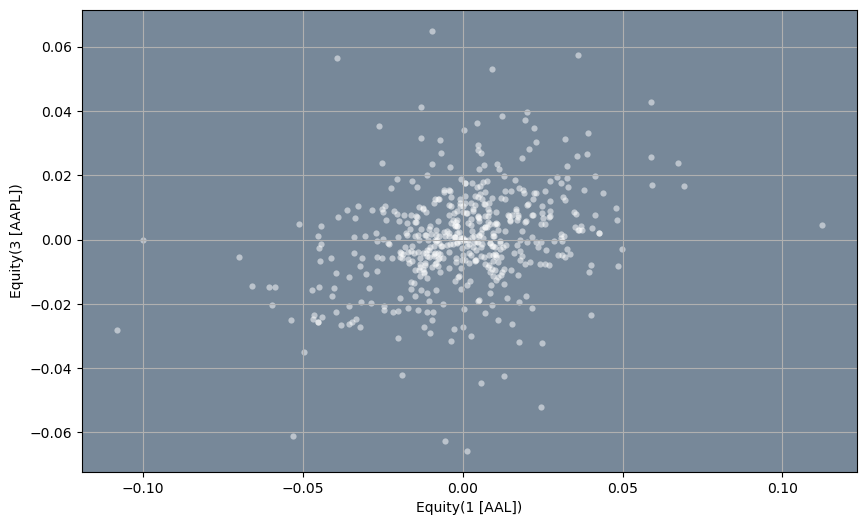

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Make scatter plot
ax = returns.plot.scatter(x = 1, y = 3, grid = True, color = 'white', alpha = 0.5, linewidth = 0)
ax.set_facecolor('lightslategray')

# Correlation of Returns

Apart from visualizing the correlation between stocks as we did above, we can also create a correlation dataframe that gives the correlation between every stock. In the code below, we can accomplish this using the `.corr()` method to calculate the correlation between all the paris of stocks in our `returns` dataframe.

In [32]:
# Display the correlation between all stock pairs in the returns dataframe
returns.corr(method = 'pearson').head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABT]),Equity(6 [ACN]),Equity(7 [ADBE]),Equity(8 [ADI]),Equity(9 [ADM]),...,Equity(398 [WYNN]),Equity(399 [XEL]),Equity(400 [XOM]),Equity(401 [XRAY]),Equity(402 [XRX]),Equity(403 [XYL]),Equity(404 [YUM]),Equity(405 [ZBH]),Equity(406 [ZION]),Equity(407 [ZTS])
Equity(0 [A]),1.000000,0.417551,0.277893,0.458313,0.473327,0.638918,0.587916,0.547726,0.515511,0.450297,...,0.345046,0.183192,0.454272,0.548510,0.488383,0.607867,0.405501,0.516846,0.554014,0.483542
Equity(1 [AAL]),0.417551,1.000000,0.244842,0.313096,0.251641,0.397620,0.365131,0.367970,0.356175,0.303093,...,0.201311,0.087405,0.207676,0.347355,0.297076,0.333614,0.296205,0.289647,0.372481,0.298188
Equity(2 [AAP]),0.277893,0.244842,1.000000,0.235650,0.232552,0.329044,0.260655,0.286731,0.265382,0.315914,...,0.199004,0.211431,0.238679,0.286744,0.253608,0.356050,0.312864,0.301354,0.319596,0.220700
Equity(3 [AAPL]),0.458313,0.313096,0.235650,1.000000,0.239296,0.405979,0.425764,0.438057,0.490355,0.280711,...,0.225762,0.157377,0.353510,0.345054,0.316185,0.391300,0.360540,0.308472,0.337810,0.338437
Equity(4 [ABBV]),0.473327,0.251641,0.232552,0.239296,1.000000,0.463999,0.251825,0.332446,0.297925,0.279535,...,0.269316,0.103974,0.298428,0.347158,0.240651,0.308757,0.236486,0.434083,0.314303,0.427493


As we can see, this is a better way to see how correlated the stock returns are than through visulaization. By looking at the table we can easily spot which pairs of stock have the highest correlation. 

# TODO:

In the code below, make a scatter of equity `A` and equity `XOM`.

In [69]:
# get index of XOM stock
symbols = [row.symbol for row in returns.columns]
symbols.index('A'), symbols.index('XOM')

(0, 400)

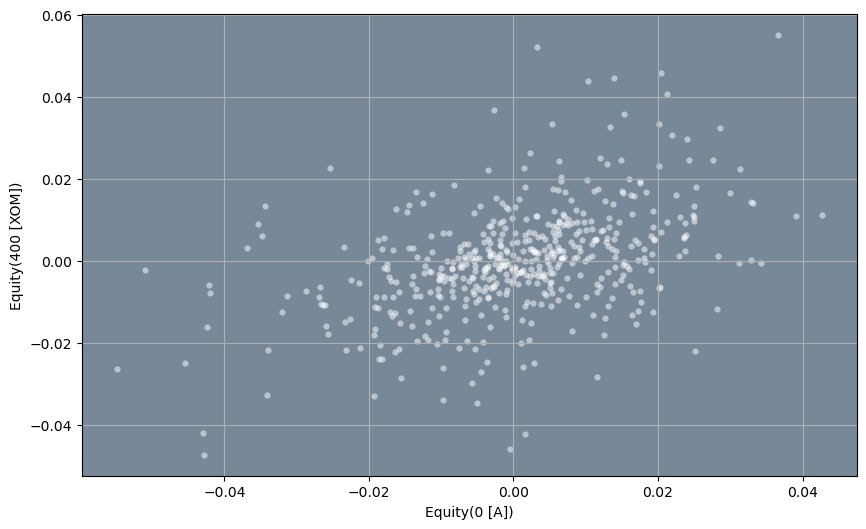

In [70]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Make scatter plot
# returns.columns
ax = returns.plot.scatter(x = 0, y = 400, grid = True, color = 'white', alpha = 0.5, linewidth = 0)

ax.set_facecolor('lightslategray')

# TODO:

In the code below, write a function `get_num_components(df, var_ret)` that takes a dataframe, `df`, and a value for the desired amount of variance you want to retain from the `df` dataframe,`var_ret`. In this case, the parameter `df` should be the `returns` dataframe obtained above. The parameter  `var_ret` must be anumber between 0 and 1. The function should return the number of principal components you need to retain that amount of variance. To do this, use Scikit-Learn's PCA() class and its `.explained_variance_ratio_`. The function should also print the total amount of variance retained. 

In [40]:
from sklearn.decomposition import PCA
import numpy as np

def get_num_components(df, var_ret):
    
    num=1
    var=0
    # loop to increment variance and components
    while var<var_ret:
        model = PCA(n_components=num)
        model = model.fit(df)
        # check variance
        var = model.explained_variance_ratio_.sum()
        num = num+1

    
    return num-1
        
            
num_components = get_num_components(returns, 0.9)

print('\nNumber of Principal Components Needed: ', num_components)


Number of Principal Components Needed:  121


# TODO:

In the previous section you calculated the number of principal compenents needed to retain a given amount of variance. As you might notice you can greatly reduce the dimensions of the data even if you retain a high level of variance (`var_ret` > 0.9). In the code below, use the number of components needed calculated in the last section, `num_components` to calculate by the percentage of dimensionality reduction. For example, if the original data was 100-dimensional, and the amount of components needed to retian a certain amount of variance is 70, then we are able to reduce the data by 30%. 

In [42]:
# Calculate the percentage of dimensionality reduction
total_dim = returns.shape[1]
red_per = (num_components)*100/total_dim
print('We were able to reduce the dimenionality of the data by:', red_per, 'percent')

We were able to reduce the dimenionality of the data by: 29.65686274509804 percent


## Solution

[Solution notebook](pca_basics_solution.ipynb)